In [45]:
import pandas as pd 
import seaborn as sns 
import numpy as np

from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, auc, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib.patches import Shadow
from matplotlib.lines import Line2D

# Set matplotlib style 
mpl.rcParams['font.family'] = 'family'
sns.set(font="family", font_scale=1.5)

# 1. Random split

In [26]:
df_1 = pd.read_csv('results/random_split_fp_descriptors_test_size_0.2')
df_2 = pd.read_csv('results/random_split_dft_descriptors_test_size_0.2')
df_3 = pd.read_csv('results/random_split_rxnfp_descriptors_test_size_0.2')

## FP descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


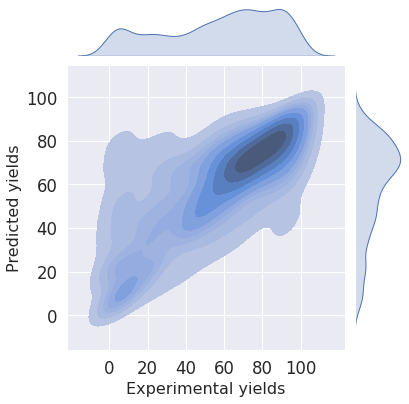

In [27]:
h = sns.jointplot("Yields", "Global model", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

fig_path = 'images/random_split_fp_descriptors_test_size_0.2_full.png'
plt.savefig(fig_path)

## DFT descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Fut

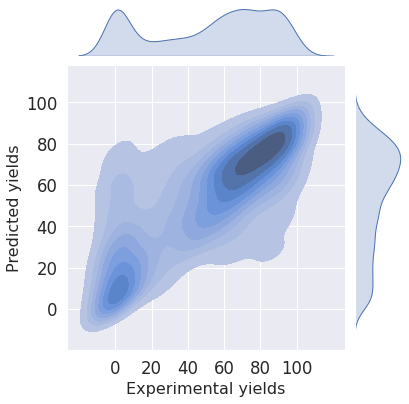

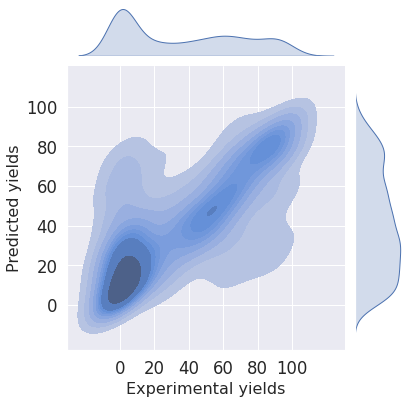

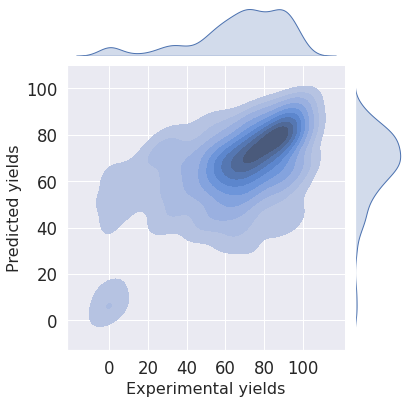

In [33]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('images/random_split_dft_descriptors_test_size_0.2_full.png')
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

h = sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_dft_descriptors_test_size_0.2_optimisation.png')
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
h = sns.jointplot("Yields", "Global model", df_2_scope, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_dft_descriptors_test_size_0.2_scope.png')
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

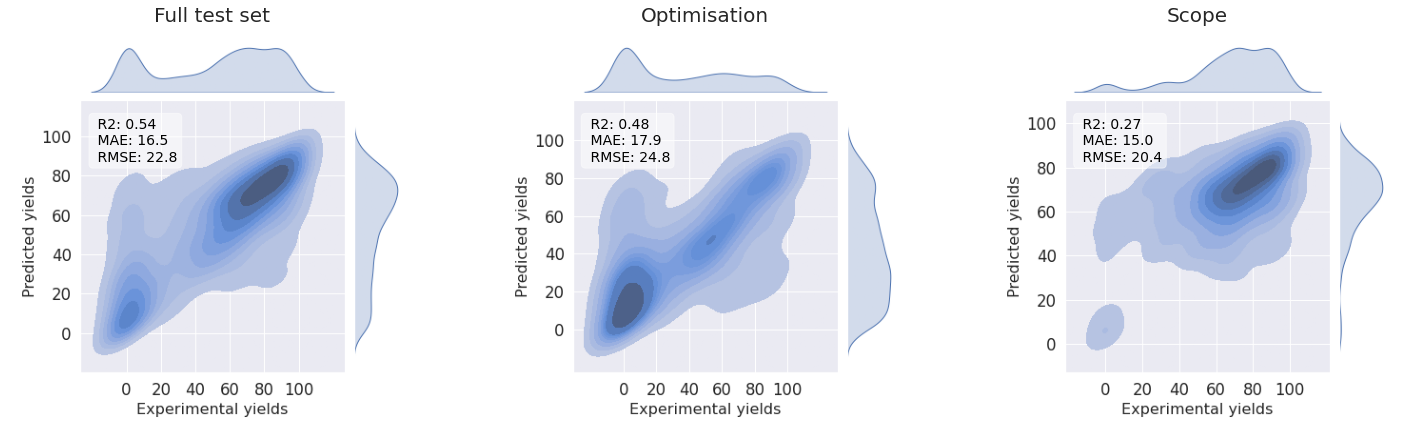

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

## RXNFP descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


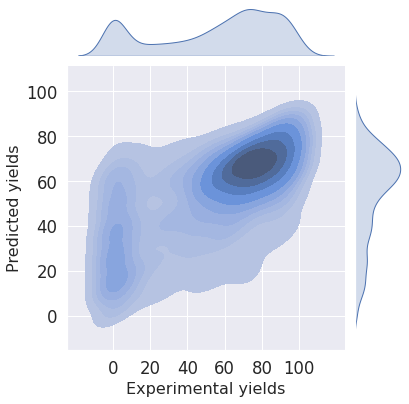

In [30]:
h = sns.jointplot("Yields", "Global model", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('images/random_split_rxnfp_descriptors_test_size_0.2_full.png')

In [21]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/random_split_fp_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))

fig_paths.append('images/random_split_rxnfp_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))


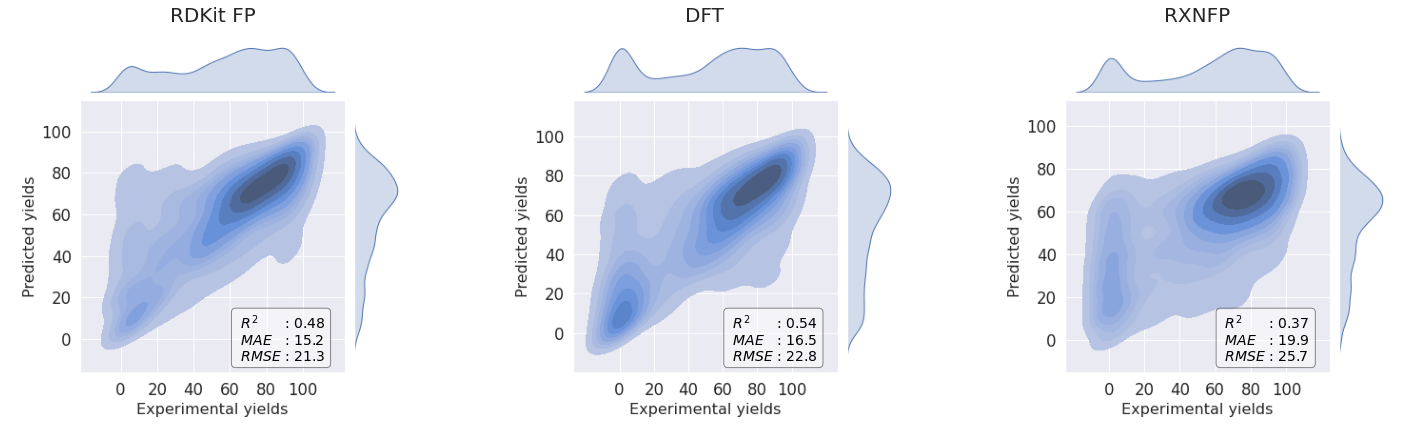

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    
    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14,  
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

# 2. Substrate split

In [35]:
df_1 = pd.read_csv('results/substrate_split_fp_descriptors')
df_2 = pd.read_csv('results/substrate_split_dft_descriptors')
df_3 = pd.read_csv('results/substrate_split_rxnfp_descriptors')

## FP descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


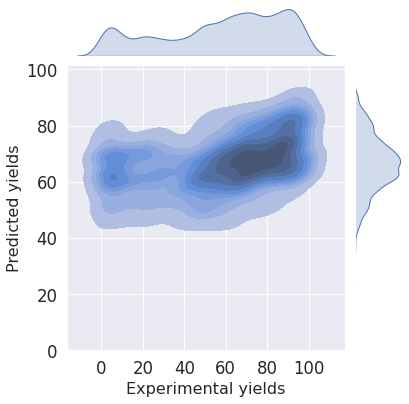

In [36]:
h = sns.jointplot("Yields", "Global model", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_fp_descriptors_full.png')

## DFT descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Fut

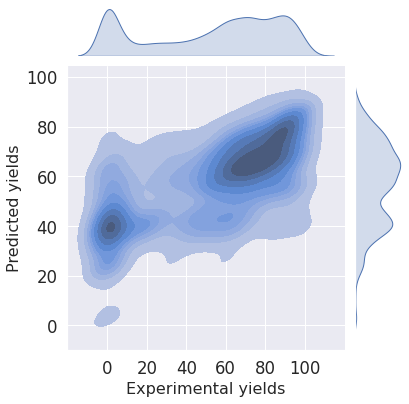

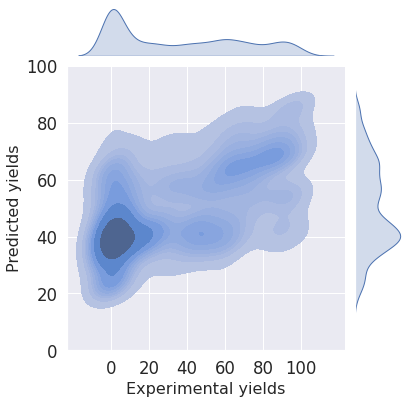

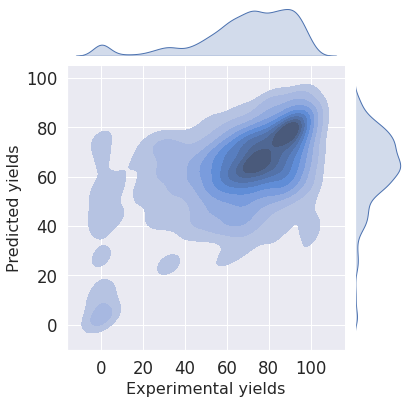

In [37]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_dft_descriptors_full.png')
fig_paths.append('images/substrate_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]
h = sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_dft_descriptors_optimisation.png')
fig_paths.append('images/substrate_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
h = sns.jointplot("Yields", "Global model", df_2_scope, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_dft_descriptors_scope.png')
fig_paths.append('images/substrate_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

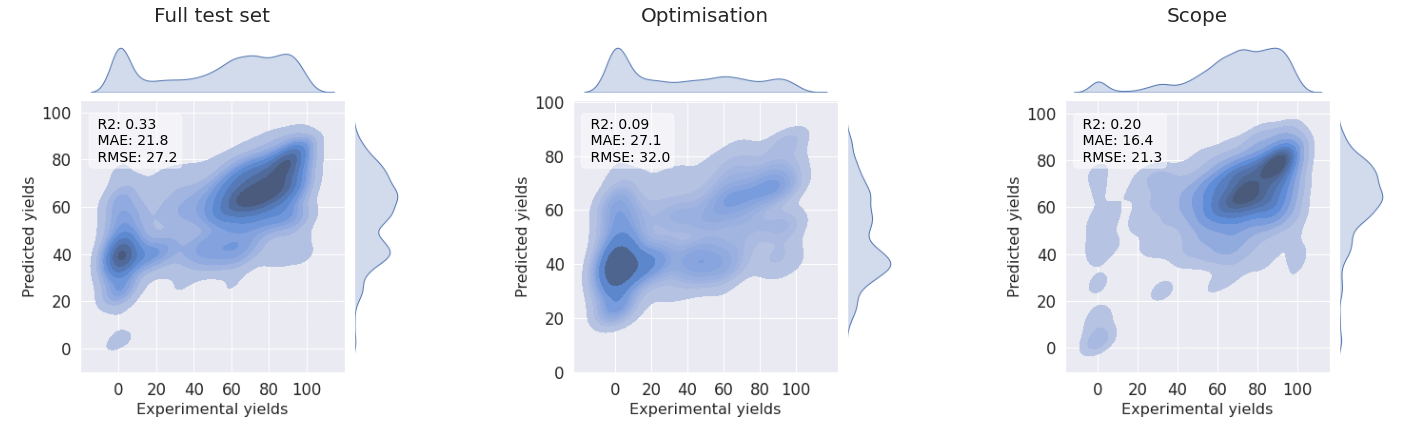

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

0.7171650157285323


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Real $\\leq$ 50%'), Text(0, 1.5, ' Real > 50%')])

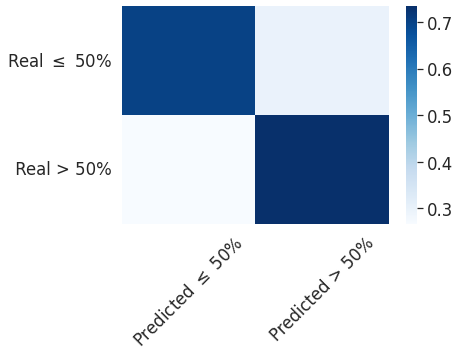

In [48]:
indices = np.where(df_2['Origin'] == "optimisation")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]


predictions = df_2_scope["Global model"]>50
cm = confusion_matrix(1 * df_2_scope["Yields"]>50, predictions, normalize="true")

fpr, tpr, thresholds = metrics.roc_curve(1 * df_2_scope["Yields"]>50, predictions)
print(metrics.auc(fpr, tpr))

df = pd.DataFrame(data=cm, index=["Real $\leq$ 50%", " Real > 50%"], columns=["Predicted $\leq$ 50%", "Predicted > 50%"])
sns.heatmap(df, cmap="Blues")
plt.xticks(rotation=45) 
plt.yticks(rotation=0) 

## RXNFP descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


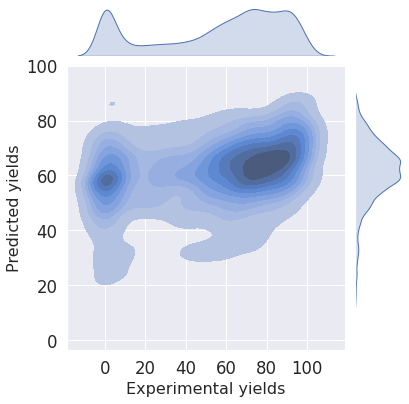

In [39]:
h = sns.jointplot("Yields", "Global model", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_rxnfp_descriptors_full.png')

findfont: Font family ['family'] not found. Falling back to DejaVu Sans.
findfont: Font family ['family'] not found. Falling back to DejaVu Sans.


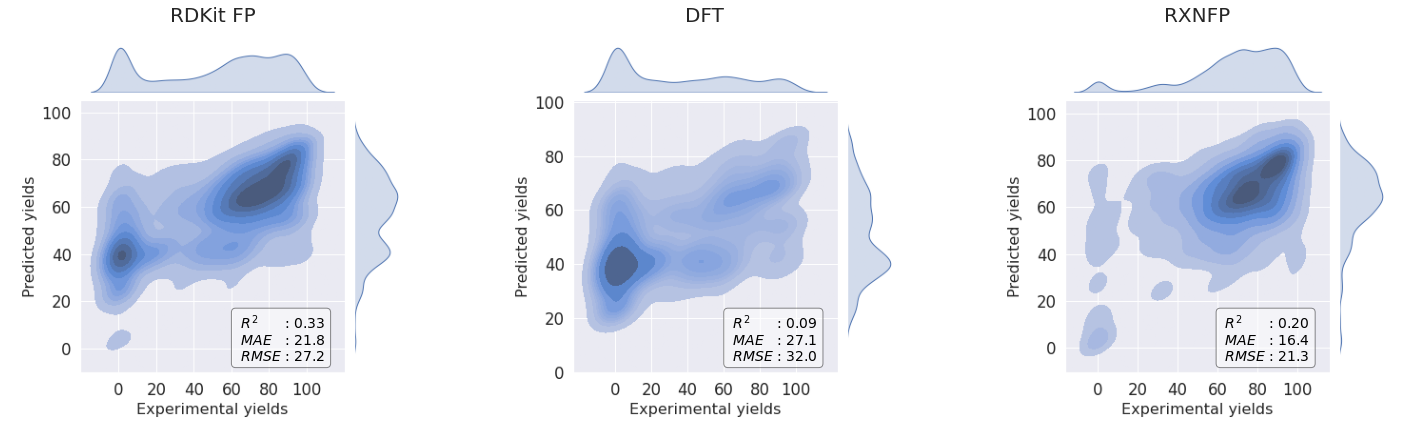

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})

    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

# 3. DOI split

In [50]:
df_1 = pd.read_csv('results/doi_split_fp_descriptors')
df_2 = pd.read_csv('results/doi_split_dft_descriptors')
df_3 = pd.read_csv('results/doi_split_rxnfp_descriptors')

## FP descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


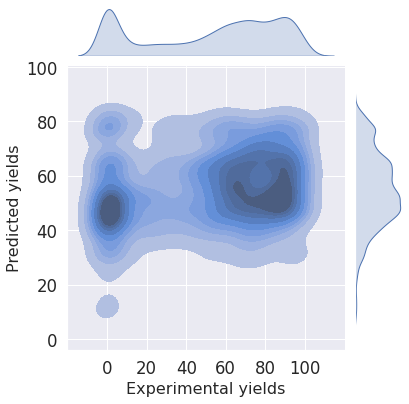

In [51]:
h = sns.jointplot("Yields", "Global model", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/doi_split_fp_descriptors_full.png')

## DFT descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Fut

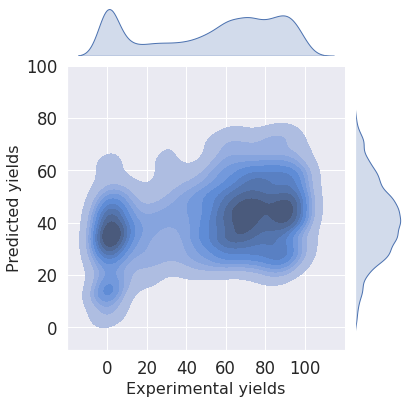

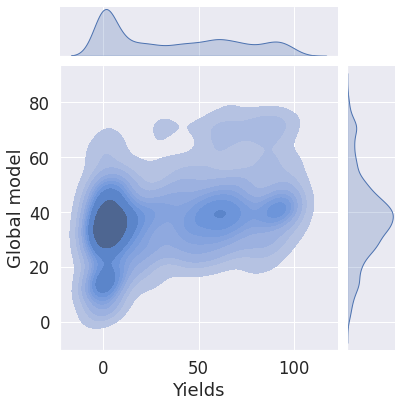

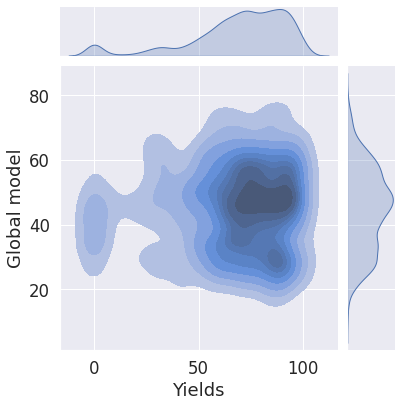

In [52]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/doi_split_dft_descriptors_full.png')
fig_paths.append('images/doi_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde', fill=True)
plt.savefig('images/doi_split_dft_descriptors_optimisation.png')
fig_paths.append('images/doi_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_scope, kind='kde', fill=True)
plt.savefig('images/doi_split_dft_descriptors_scope.png')
fig_paths.append('images/doi_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

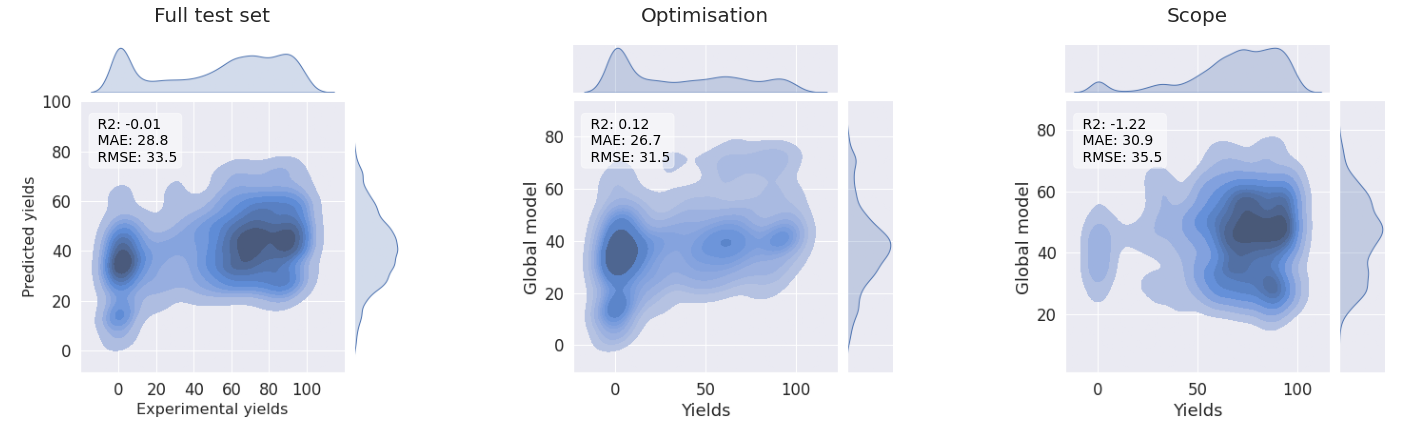

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


## RXNFP descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


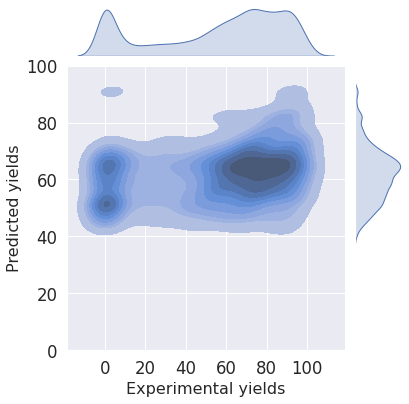

In [54]:
h = sns.jointplot("Yields", "Global model", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/doi_split_rxnfp_descriptors_full.png')

In [55]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/doi_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


fig_paths.append('images/doi_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))

fig_paths.append('images/doi_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))

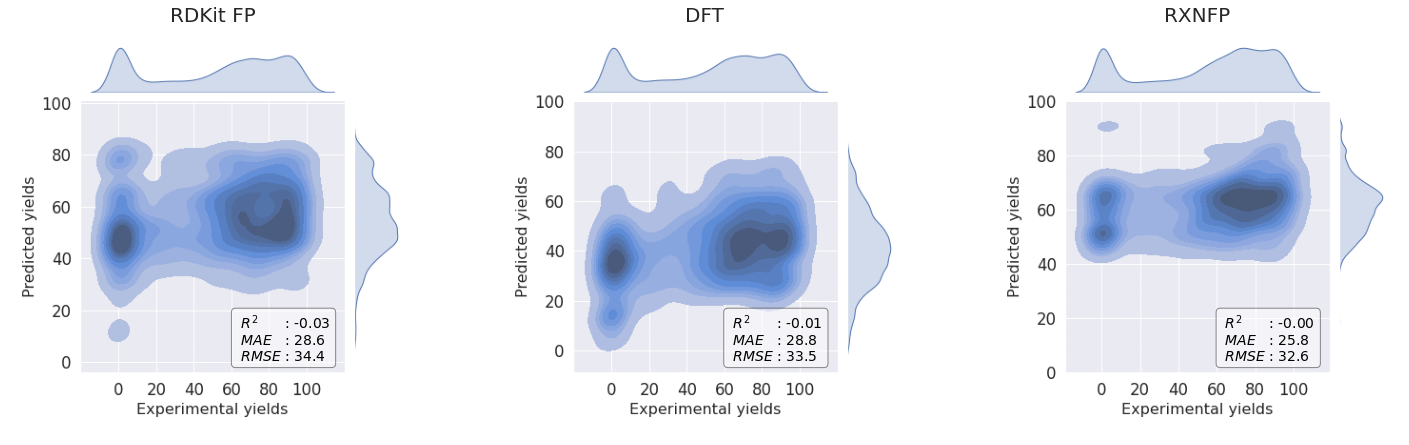

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

# 4. Mechanism split

In [58]:
df_1 = pd.read_csv('results/mechanisms_split_fp_descriptors')
df_2 = pd.read_csv('results/mechanisms_split_dft_descriptors')
df_3 = pd.read_csv('results/mechanisms_split_rxnfp_descriptors')

## FP descriptors

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


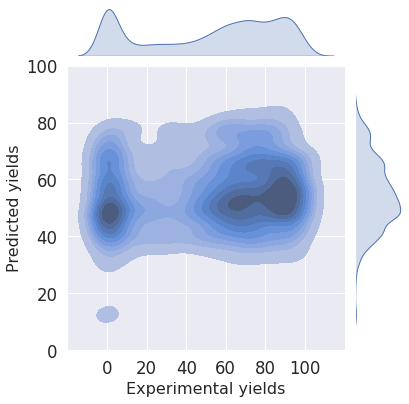

In [59]:
h = sns.jointplot("Yields", "Global model", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/mechanism_split_fp_descriptors_full.png')

## DFT descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Fut

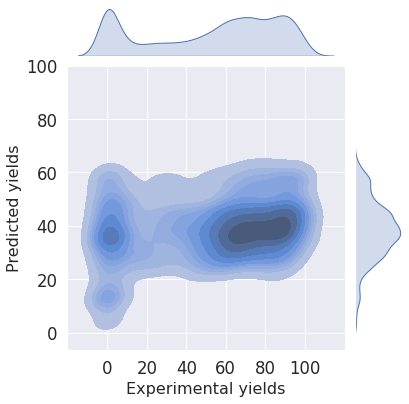

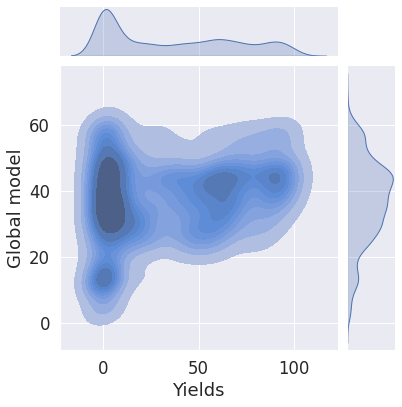

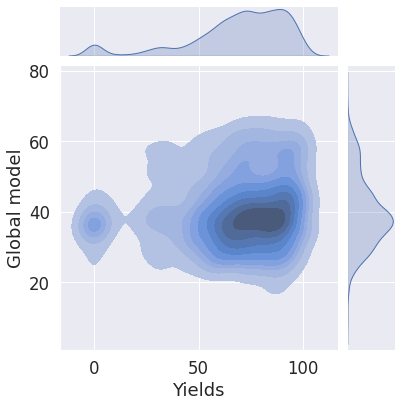

In [60]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/mechanism_split_dft_descriptors_full.png')
fig_paths.append('images/mechanism_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde', fill=True)
plt.savefig('images/mechanism_split_dft_descriptors_optimisation.png')
fig_paths.append('images/mechanism_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_scope, kind='kde', fill=True)
plt.savefig('images/mechanism_split_dft_descriptors_scope.png')
fig_paths.append('images/mechanism_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

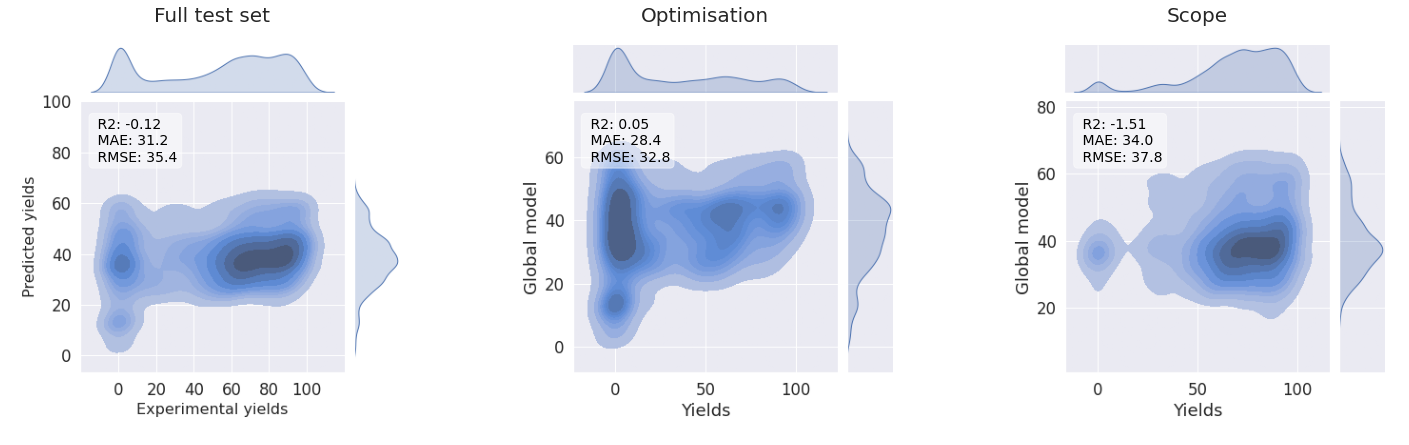

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


## RXNFP descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


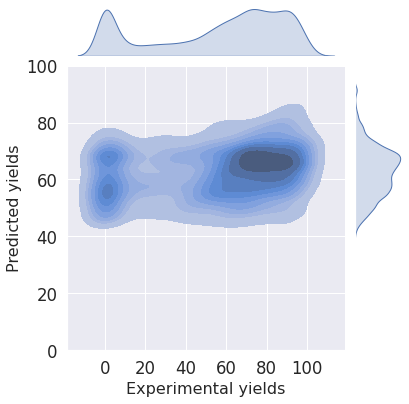

In [62]:
h = sns.jointplot("Yields", "Global model", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/mechanism_split_rxnfp_descriptors_full.png')

In [63]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/mechanism_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


fig_paths.append('images/mechanism_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))

fig_paths.append('images/mechanism_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))

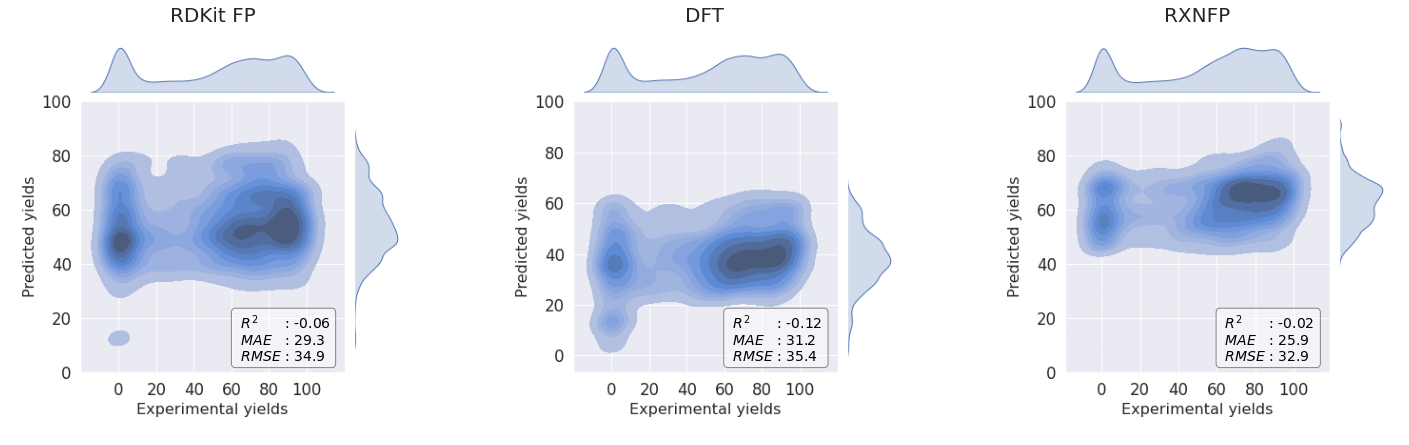

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

# 5. Training set size influence 

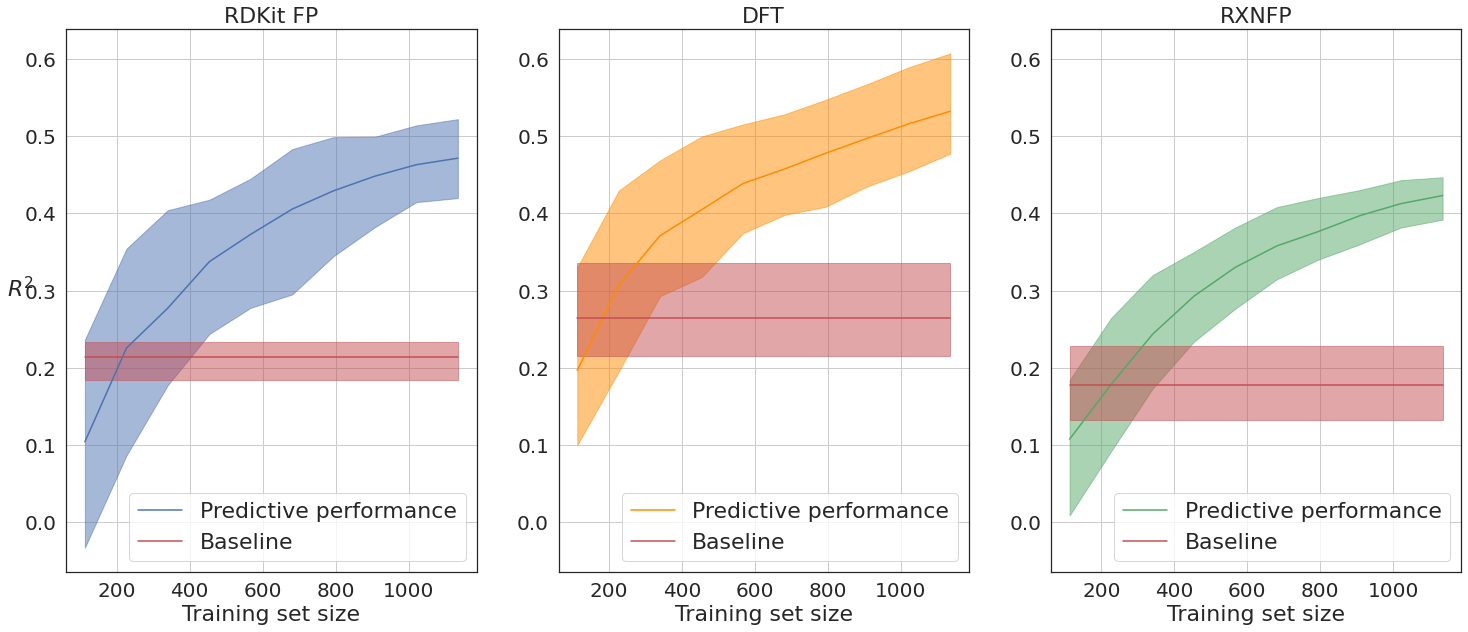

In [65]:
sns.set_style("white")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10), sharey=True)
df_1 = pd.read_csv('results/training_size_influence_fp_descriptors')
df_2 = pd.read_csv('results/training_size_influence_dft_descriptors')
df_3 = pd.read_csv('results/training_size_influence_rxnfp_descriptors')
dfs = [df_1, df_2, df_3]
origins = ["RDKit FP", "DFT", "RXNFP",]
colors = ['b', 'darkorange', 'g']
for i, origin in enumerate(origins):
    ax = axes[i]
    df = dfs[i]
    sizes = df["Sizes"]
    metric_mean = df["Metric mean"]
    metric_lower = df["Metric lower"]
    metric_upper = df["Metric upper"]
    baseline_mean = df["Baseline mean"]
    baseline_lower = df["Baseline lower"]
    baseline_upper = df["Baseline upper"]
    ax.set_title(origins[i], fontsize=22)
    ax.plot(sizes, metric_mean, color= colors[i], label='Predictive performance')
    ax.fill_between(sizes, metric_lower, metric_upper, color = colors[i], alpha=0.5)
    
    #plt.plot(sizes_o, metric_mean_o, label='Model predictions_scope/opt_info')
    #plt.fill_between(sizes_o, metric_lower_o, metric_upper_o, alpha=0.5)
     
    ax.plot(sizes, baseline_mean, c='r', label='Baseline')
    ax.fill_between(sizes, baseline_lower, baseline_upper, color='r', alpha=0.5)
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.legend(fontsize=22, loc=4)
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
    ax.set_xlabel("Training set size", fontsize=22)
    if i==0:
        ax.set_ylabel("$R^2$", fontsize=22, rotation=0)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.grid(True)
    
plt.show()

# 6. Restricted chemical space: Suzuki

In [66]:
df_1 = pd.read_csv('results/random_split_fp_descriptors_test_size_0.2_mechanism_suzuki')
df_2 = pd.read_csv('results/random_split_dft_descriptors_test_size_0.2_mechanism_suzuki')
df_3 = pd.read_csv('results/random_split_rxnfp_descriptors_test_size_0.2_mechanism_suzuki')

## FP descriptors

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


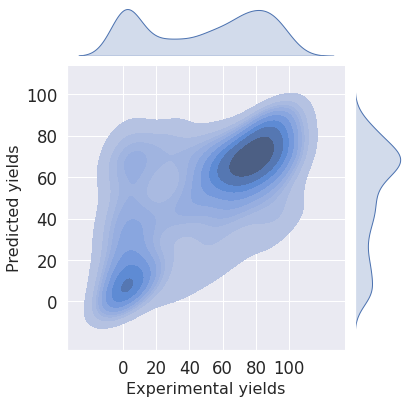

In [70]:
h = sns.jointplot("Yields", "Global model", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_fp_descriptors_full_mechanism_suzuki.png')

## DFT descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Fut

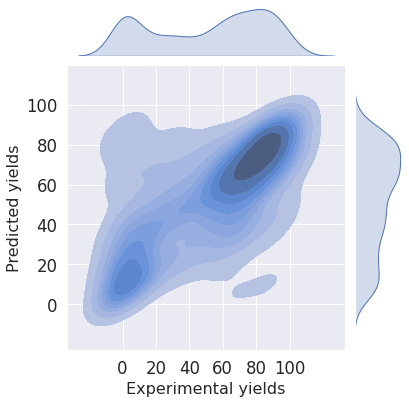

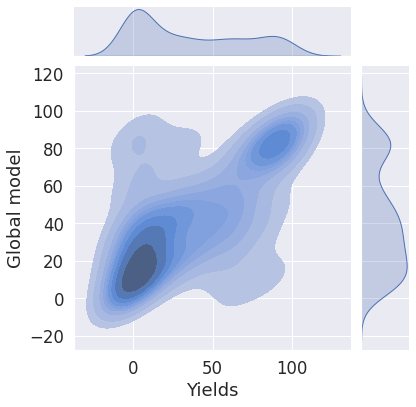

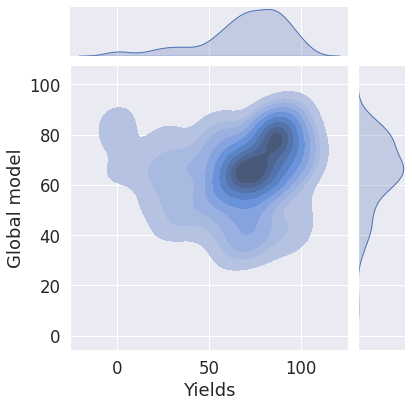

In [71]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_dft_descriptors_full_mechanism_suzuki.png')
fig_paths.append('images/random_split_dft_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde', fill=True)
plt.savefig('images/random_split_dft_descriptors_optimisation_mechanism_suzuki.png')
fig_paths.append('images/random_split_dft_descriptors_optimisation_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_scope, kind='kde', fill=True)
plt.savefig('images/random_split_dft_descriptors_scope_mechanism_suzuki.png')
fig_paths.append('images/random_split_dft_descriptors_scope_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

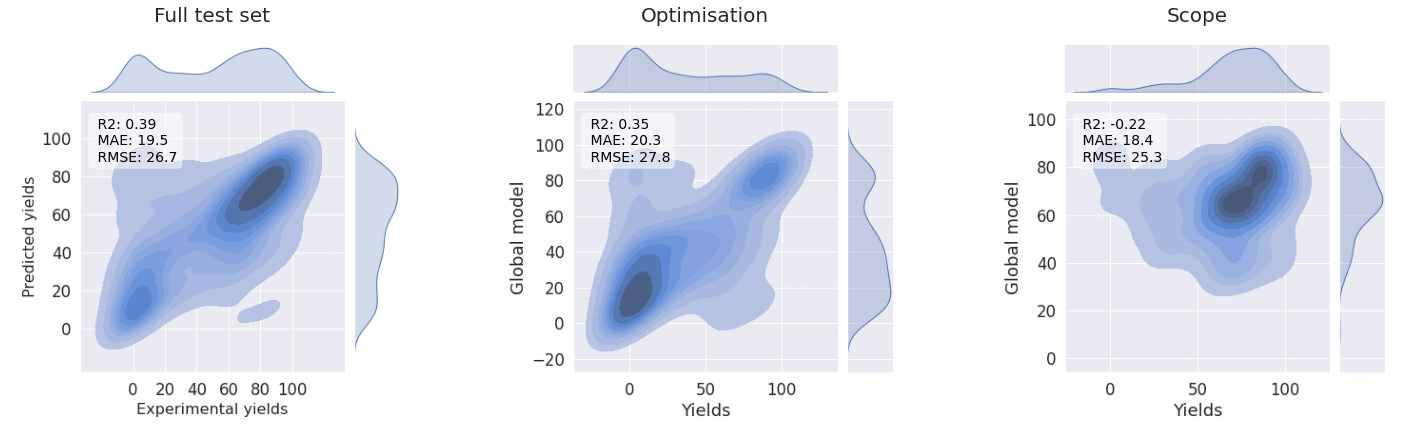

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


## RXNFP descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


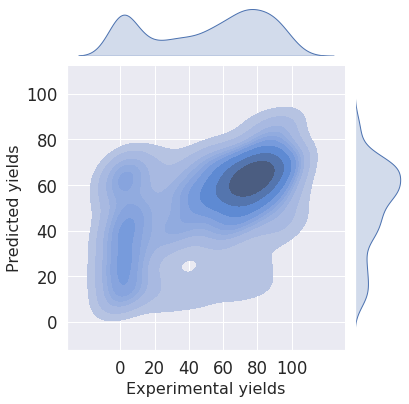

In [73]:
h = sns.jointplot("Yields", "Global model", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_rxnfp_descriptors_full.png')

In [74]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/random_split_fp_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


fig_paths.append('images/random_split_dft_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))

fig_paths.append('images/random_split_rxnfp_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))

FileNotFoundError: [Errno 2] No such file or directory: 'images/random_split_fp_descriptors_full_mechanism_suzuki.png'

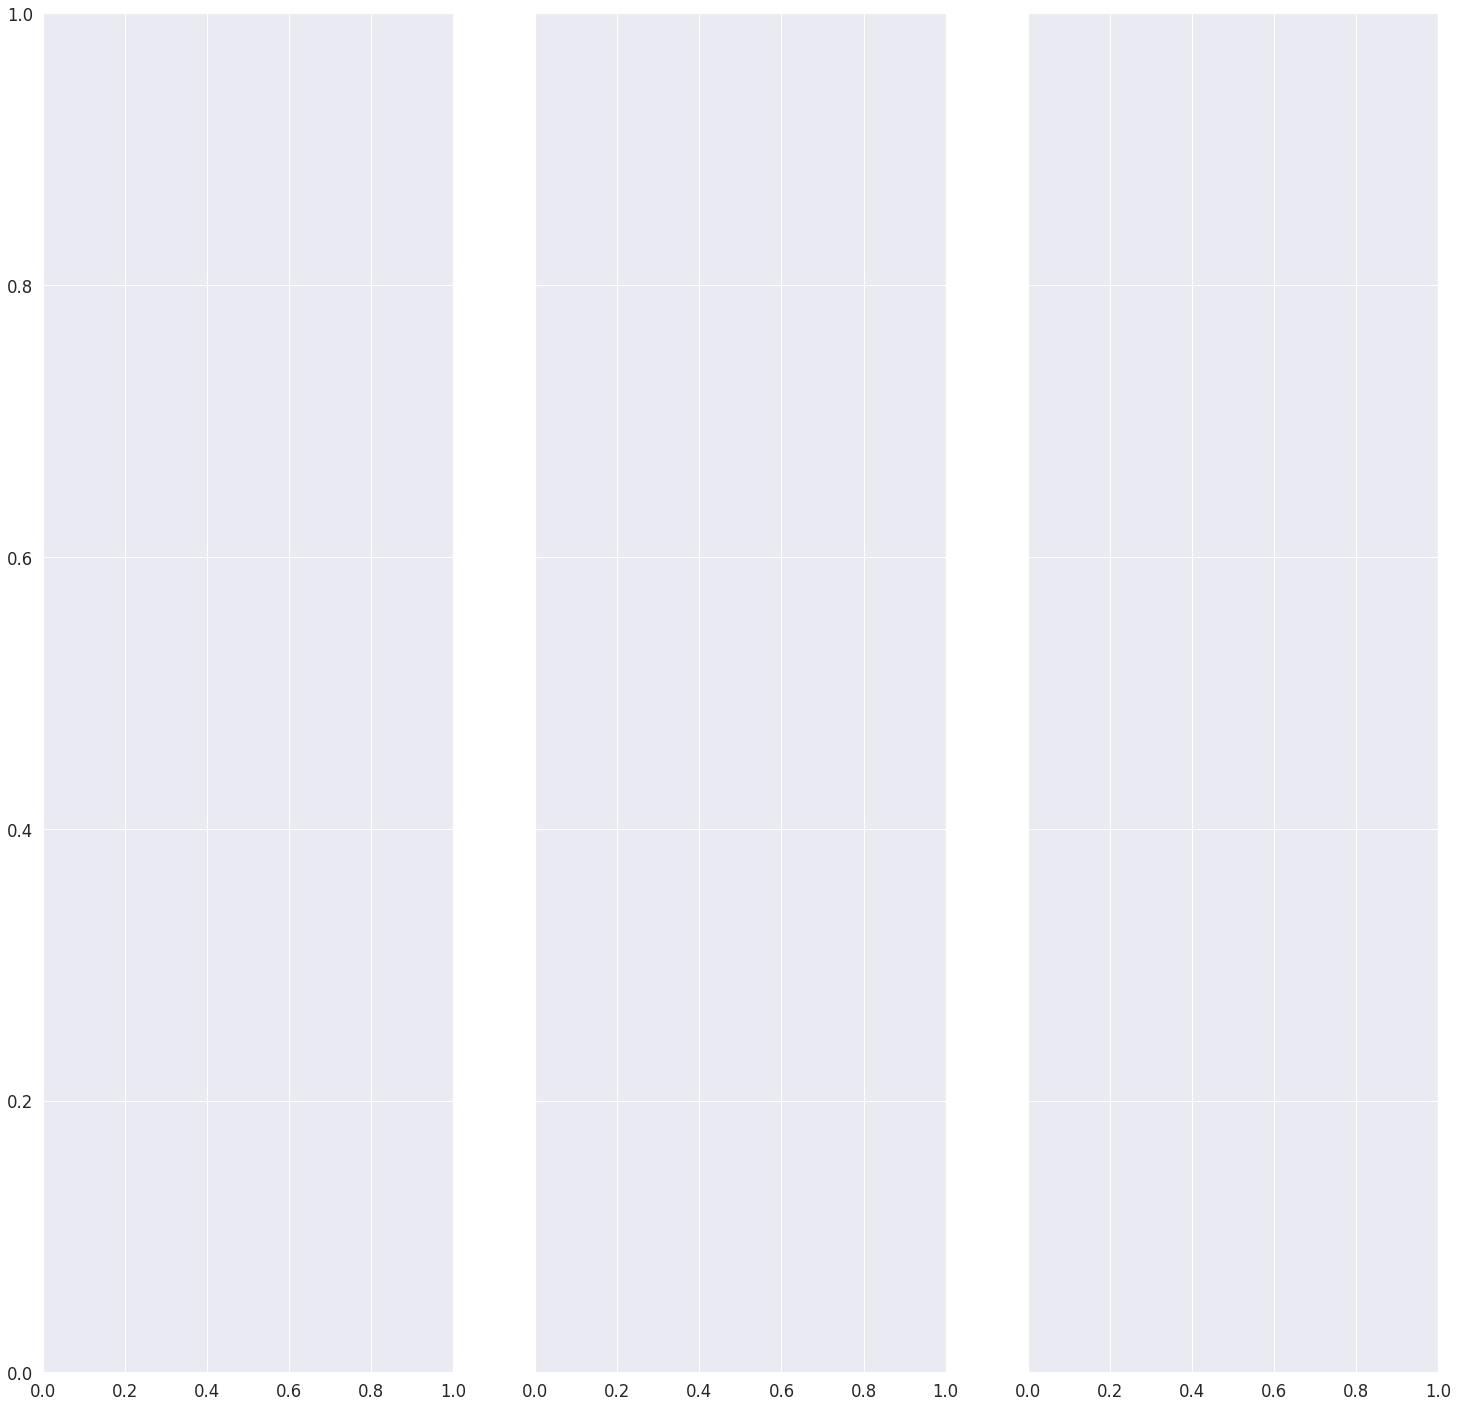

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))